In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

data = pd.read_csv('insurance.csv')
print("Setup done")

Setup done


## Data exploration:

In [2]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
df_num = data[['age', 'bmi', 'children']]
df_cat = data[['sex', 'smoker', 'region']]

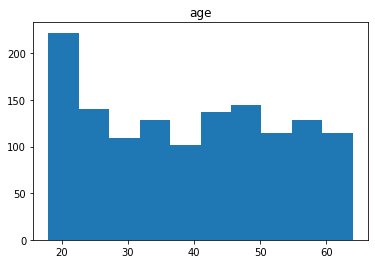

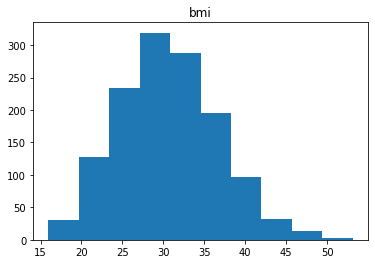

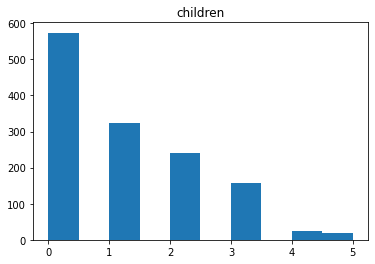

In [14]:
for i in df_num.columns:
    plt.hist(data[i])
    plt.title(i)
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


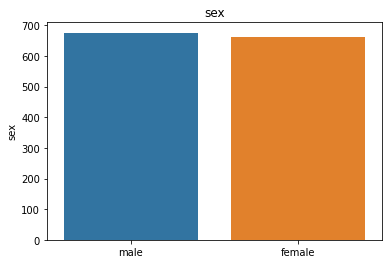

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


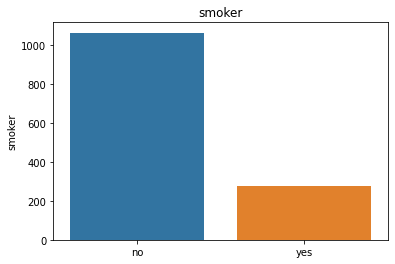

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


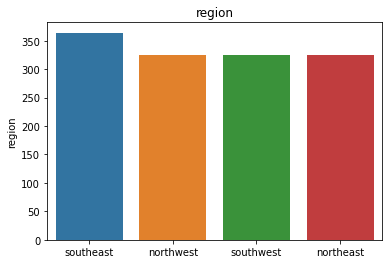

In [18]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index, df_cat[i].value_counts()).set_title(i)
    plt.show()

In [23]:
for i in data.columns:
    print(f'{i}: {data[i].isnull().sum()}')
    
#Zero null values in the dataset

age: 0
sex: 0
bmi: 0
children: 0
smoker: 0
region: 0
charges: 0


<AxesSubplot:>

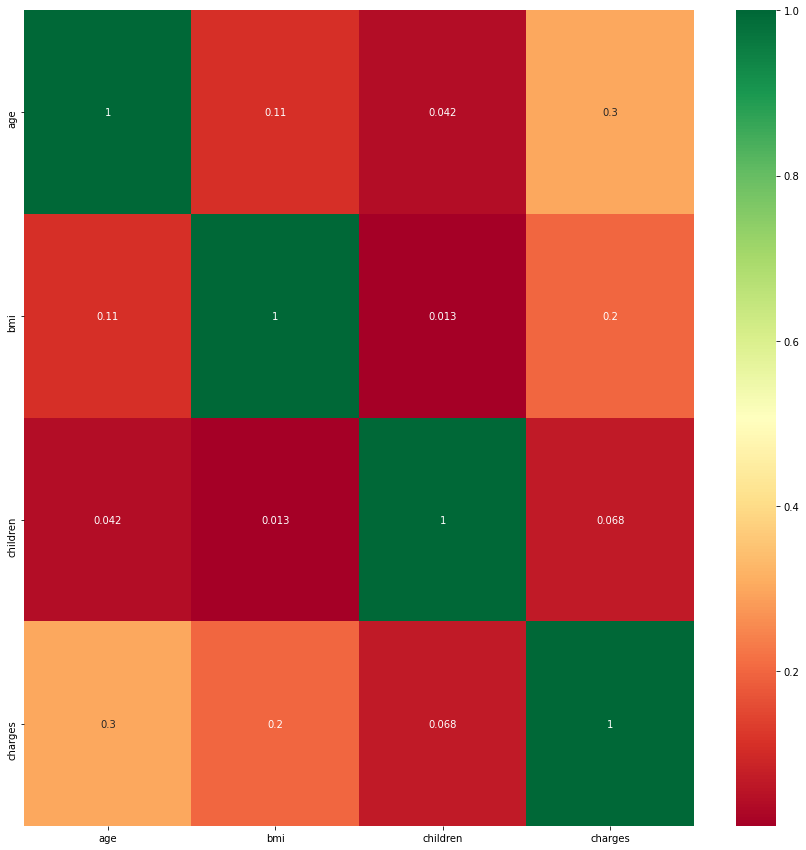

In [25]:
#Looking at correlation between numerical features
corr = data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data[corr.index].corr(), annot=True, cmap="RdYlGn")

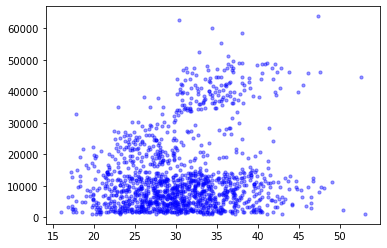

In [17]:
#Relationship with bmi and the insurance cost
plt.scatter(data['bmi'], data['charges'], 40, c='b', alpha=0.4, marker='.')
plt.show()
#Conclusion: 
#Some people in the dataset have a very low bmi (+ young and dont smoke), but still have a very high insurance cost - might be outliers that we want to remove

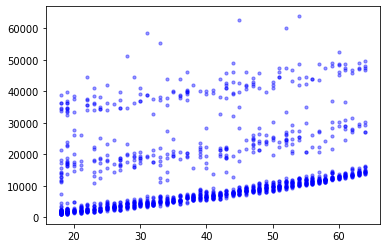

In [12]:
#Relationship between age and insurance cost
plt.scatter(data['age'], data['charges'], 40, c='b', alpha=0.4, marker='.')
plt.show()

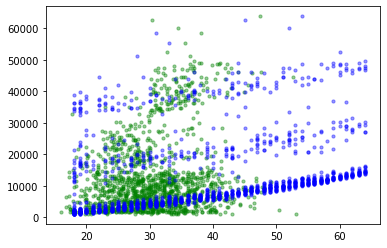

In [14]:
plt.scatter(data['bmi'], data['charges'], 40, c='g', alpha=0.4, marker='.')
plt.scatter(data['age'], data['charges'], 40, c='b', alpha=0.4, marker='.')
plt.show()
#We can see that there is a direct correlation between increase in age and higher charges, but not with bmi

## Preprocessing:

In [4]:
#creating dummies
dummies = pd.get_dummies(data[data.columns])

#Forgot to avoid dummy-variable trap
target = dummies['charges'] #y-variable
dummies.drop(['charges'], axis=1, inplace=True)

#feature scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df_scaled = scale.fit_transform(dummies[['age', 'bmi', 'children']]) #did not scale the binary features and the target

In [5]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

,0,1,2
0,-1.438764,-0.453320,-0.908614
1,-1.509965,0.509621,-0.078767
2,-0.797954,0.383307,1.580926
3,-0.441948,-1.305531,-0.908614
4,-0.513149,-0.292556,-0.908614


In [6]:
df = dummies.copy()
df.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [7]:
df['age'] = df_scaled[0]
df['bmi'] = df_scaled[1]
df['children'] = df_scaled[2]

df.head()
#Combining the scaled numerical values with the categorical dummies

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,1,0,0,1,0,0,0,1
1,-1.509965,0.509621,-0.078767,0,1,1,0,0,0,1,0
2,-0.797954,0.383307,1.580926,0,1,1,0,0,0,1,0
3,-0.441948,-1.305531,-0.908614,0,1,1,0,0,1,0,0
4,-0.513149,-0.292556,-0.908614,0,1,1,0,0,1,0,0


## Model building:

In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.33)

def model_validator(model, alg):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred) #y-true, y-predicted
    print(f'MAE {alg} : {mae}')

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_validator(lr, 'lr')

MAE lr : 4117.221545695702


In [58]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.001)
model_validator(ridge)

MAE: 4180.762403549339


In [78]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2)
model_validator(knn)

MAE: 3504.5320183654712


In [72]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
model_validator(km)

MAE: 13127.750352262332


In [32]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
model_validator(rf, 'rf')

MAE rf : 2534.313431927599


In [116]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
model_validator(xgb)

MAE: 3093.1850766073844


In [32]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()
model_validator(abr)

MAE: 3832.044138318599


In [134]:
from sklearn.svm import SVR
svm = SVR()
model_validator(svm)

MAE: 8650.561072538854


#### - The random forest algorithm gave the best results

## Parameter tuning

In [35]:
#Creating parameter grid
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=10)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5]
bootstrap = [True, False]

grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

In [15]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor(random_state=1)

clf = RandomizedSearchCV(estimator = rf, param_distributions=grid, n_iter=100, cv=4, verbose=True, random_state=42, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)
print(best_clf.best_score_)
print(best_clf.best_params_)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  8.8min finished


0.8377596252887118
{'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 54, 'bootstrap': True}


In [33]:
#Testing the rf algorithm with the tuned parameters
rf_untuned = RandomForestRegressor(random_state=43)
rf_tuned = RandomForestRegressor(n_estimators=800, min_samples_split=10, min_samples_leaf=5, max_features='auto', max_depth=54, bootstrap=True, random_state=42)
model_validator(rf_untuned, 'rf untuned')
model_validator(rf_tuned, 'rf tuned')

#Conclusion: The results are slightly better with the parameter tuned model ($100-200 margin)

MAE rf untuned : 2524.2292746253256
MAE rf tuned : 2425.476522925809


### Second iteration of parameter tuning

In [39]:
grid_2 = {
    'n_estimators': [680, 720, 770, 800, 830, 880],
    'max_features': ['auto'],
    'max_depth': [47, 50, 54, 58],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [4, 5, 6],
    'bootstrap': [True]
}

In [40]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor(random_state=1)

clf = RandomizedSearchCV(estimator = rf, param_distributions=grid_2, n_iter=100, cv=4, verbose=True, random_state=42, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)
print(best_clf.best_score_)
print(best_clf.best_params_)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  6.5min finished


0.8408694871819173
{'n_estimators': 830, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'auto', 'max_depth': 54, 'bootstrap': True}


In [44]:
rf_untuned = RandomForestRegressor(random_state=43)
rf_tuned_2 = RandomForestRegressor(n_estimators=830, min_samples_split=10, min_samples_leaf=6, max_features='auto', max_depth=54, bootstrap=True, random_state=42)
model_validator(rf_untuned, 'rf untuned')
model_validator(rf_tuned_2, 'rf tuned 2')
#Conclusion: slight improvement - not very significant

MAE rf untuned : 2524.2292746253256
MAE rf tuned 2 : 2418.397943886593


## Part 2: Improving the model by optimizing the data

In [27]:
#Outliers that need to be removed
# - People who have high insurance cost, but low bmi, low age and dont smoke
# - People who have super high insurance cost, because there is no way that the variables in the dataset can cause so high prices, there has to be other factors
#   - The average annual cost of health insurance in the US is around $6000

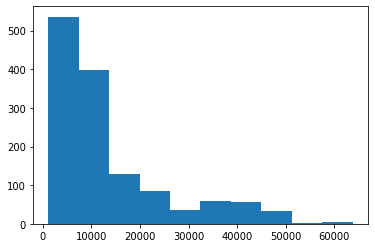

In [265]:
#First we have to define what is 'high insurance cost':
plt.hist(data['charges'])
plt.show()
#Conclusion: Anything over 20000 is pretty high relative to the other instances in the dataset
data2 = data.copy()

In [266]:
data2['charges'].quantile(0.95)

41181.82778749992

In [267]:
data2.shape

(1338, 7)

In [268]:
#These are instances where the insurance cost is high because of other reasons that are not relavant to the dataset
to_drop = data2.loc[(data2['charges'] > 20000) & (data2['bmi'] < 25) & (data2['age'] < 40) & (data2['smoker']=='no')]
data2.drop(to_drop.index, inplace=True)
data2.shape

(1331, 7)

In [269]:
to_drop = data2.loc[(data2['charges'] < 5000) & (data2['bmi'] >= 33) & (data2['age'] >= 35)]
data2.drop(to_drop.index, inplace=True)
print(to_drop)
print(data2.shape)

     age   sex   bmi  children smoker     region   charges
449   35  male  38.6         1     no  southwest  4762.329
(1330, 7)


In [270]:
#Removing the instances with ridicoulously high insurance cost because the price is probably affected by external factors
to_drop = data2.loc[data2['charges'] > 40000]
data2.drop(to_drop.index, inplace=True)
data2.shape

(1251, 7)

## Preprocessing part 2

In [273]:
dummies2 = pd.get_dummies(data2[data2.columns])
target2 = dummies2['charges'] #y-variable
dummies2.drop(['charges'], axis=1, inplace=True)
df_2 = dummies2.copy()

from sklearn.preprocessing import StandardScaler
scale2 = StandardScaler()
df_2[['age', 'bmi', 'children']] = scale2.fit_transform(dummies2[['age', 'bmi', 'children']])
df_2.head(5)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.402339,-0.405077,-0.894264,1,0,0,1,0,0,0,1
1,-1.473612,0.578412,-0.068027,0,1,1,0,0,0,1,0
2,-0.760877,0.449402,1.584445,0,1,1,0,0,0,1,0
4,-0.475783,-0.240883,-0.894264,0,1,1,0,0,1,0,0
5,-0.547057,-0.766974,-0.894264,1,0,1,0,0,0,1,0


In [278]:
from sklearn.ensemble import RandomForestRegressor
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_2, target2, test_size=0.33)

rf = RandomForestRegressor(random_state=1)
rf.fit(X_train_2, y_train_2)
y_pred = rf.predict(X_test_2)
mae = mean_absolute_error(y_test_2, y_pred)
print(f'MAE: {mae}')

#conclusion: Not a significant improvement although we removed some outliers

MAE: 2489.60113944471


## Model deployment

In [78]:
import pickle
df_final = dummies.copy() #using the dummies dataset which is not scaled because random forest does not need scaled values, and scaling would make deployment harder

final_model = RandomForestRegressor(n_estimators=830, min_samples_split=10, min_samples_leaf=6, max_features='auto', max_depth=54, bootstrap=True, random_state=42)
final_model.fit(df_final, target)

#saving model
file = open('insurance-model.pkl', 'wb')
pickle.dump(final_model, file)

In [79]:
###Testing###
import pickle

with open('insurance-model.pkl', 'rb') as file:  
    pk_model = pickle.load(file)

In [58]:
df.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,1,0,0,1,0,0,0,1
1,-1.509965,0.509621,-0.078767,0,1,1,0,0,0,1,0
2,-0.797954,0.383307,1.580926,0,1,1,0,0,0,1,0
3,-0.441948,-1.305531,-0.908614,0,1,1,0,0,1,0,0
4,-0.513149,-0.292556,-0.908614,0,1,1,0,0,1,0,0


In [80]:
pred = pk_model.predict([[20, 24, 0, 0, 1, 1, 0, 0, 0, 0, 1]])
print(pred)

[1690.35849794]
